<a href="https://colab.research.google.com/github/MimmoDG/NBA-Project---Programming/blob/main/Project_VR481299_Di_Grazia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# LeBron James analysis:


*   Record breaker
*   Career trends

His datasets are automatically updated using html



## Per Game LeBron

In [66]:
data = pd.read_html('https://www.basketball-reference.com/players/j/jamesle01.html')

In [67]:
LeBron_Career_PerGame_RS = pd.DataFrame(data[0])

In [68]:
for el in LeBron_Career_PerGame_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_PerGame_RS[el] = pd.to_numeric(LeBron_Career_PerGame_RS[el])

In [69]:
LeBron_Career_PerGame_RS 

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [70]:
LeB_C_PG_RS1 = LeBron_Career_PerGame_RS.drop(labels=range(19, 24), axis=0)

In [71]:
LeB_C_PG_RS = LeB_C_PG_RS1.drop(labels=['Lg', 'Age', 'GS'], axis=1)

In [72]:
LeB_C_PG_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,39.5,7.9,18.9,0.417,0.8,2.7,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,CLE,SF,80.0,42.4,9.9,21.1,0.472,1.4,3.9,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,CLE,SF,79.0,42.5,11.1,23.1,0.480,1.6,4.8,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,CLE,SF,78.0,40.9,9.9,20.8,0.476,1.3,4.0,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,CLE,SF,75.0,40.4,10.6,21.9,0.484,1.5,4.8,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,CLE,SF,81.0,37.7,9.7,19.9,0.489,1.6,4.7,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,CLE,SF,76.0,39.0,10.1,20.1,0.503,1.7,5.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,MIA,SF,79.0,38.8,9.6,18.8,0.510,1.2,3.5,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,MIA,SF,62.0,37.5,10.0,18.9,0.531,0.9,2.4,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,MIA,PF,76.0,37.9,10.1,17.8,0.565,1.4,3.3,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [73]:
LeB_C_PG_RS.to_csv('df_LBJ_xG_Stats_final.csv', index=False)

In [74]:
LeB_C_PG_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [75]:
LeB_C_PG_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.368421,37.931579,9.905263,19.594737,0.506842,1.605263,4.621053,0.345421,8.305263,14.963158,...,0.731474,1.157895,6.357895,7.494737,7.368421,1.557895,0.747368,3.510526,1.842105,27.063158
std,11.388154,2.479259,0.714511,1.473271,0.036005,0.485883,1.339809,0.026854,0.669555,1.672726,...,0.034139,0.291196,0.796740,0.818178,1.164308,0.261015,0.211787,0.331486,0.263135,2.287942
min,45.000000,33.400000,7.900000,17.600000,0.417000,0.800000,2.400000,0.290000,7.100000,12.000000,...,0.665000,0.600000,4.200000,5.500000,5.900000,1.100000,0.300000,3.000000,1.400000,20.900000
25%,68.000000,36.450000,9.650000,18.550000,0.486000,1.350000,3.800000,0.331500,8.100000,13.600000,...,0.704000,1.000000,6.000000,7.150000,6.450000,1.400000,0.600000,3.300000,1.650000,25.850000
50%,76.000000,37.700000,9.900000,19.300000,0.510000,1.600000,4.700000,0.348000,8.400000,14.900000,...,0.738000,1.100000,6.400000,7.600000,7.200000,1.600000,0.700000,3.400000,1.800000,27.100000
75%,79.000000,39.250000,10.100000,20.450000,0.526500,1.750000,5.050000,0.362500,8.600000,16.300000,...,0.756500,1.300000,6.950000,7.950000,8.050000,1.650000,0.900000,3.650000,2.050000,27.950000
max,82.000000,42.500000,11.100000,23.100000,0.567000,2.800000,7.900000,0.406000,9.500000,18.300000,...,0.780000,1.800000,7.500000,8.600000,10.200000,2.200000,1.100000,4.200000,2.300000,31.400000


In [76]:
a = LeB_C_PG_RS['PTS'].head(7).mean() #media punti ai cavs (prima esperienza)
b = LeB_C_PG_RS['PTS'].iloc[7:11].mean() #media punti agli heat
c = LeB_C_PG_RS['PTS'].iloc[11:15].mean() #media punti ai cavs (seconda esperienza)
d = LeB_C_PG_RS['PTS'].tail(4).mean() #media punti ai lakers
[a, b, c, d]

[27.842857142857145, 26.924999999999997, 26.125, 26.775]

In [77]:
LeB_C_PG_RS.corr()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
G,1.000000,0.621152,-0.122465,0.057738,-0.164336,-0.662020,-0.633722,-0.212171,0.350187,0.555454,...,0.281603,0.371825,-0.393123,-0.292538,-0.052286,0.426034,0.077589,-0.154137,0.085379,0.035518
MP,0.621152,1.000000,0.215041,0.611329,-0.395825,-0.463636,-0.423350,-0.293015,0.583897,0.875602,...,0.329642,0.345150,-0.430723,-0.305562,-0.434207,0.710432,0.287957,-0.422921,0.434712,0.387080
FG,-0.122465,0.215041,1.000000,0.557342,0.450724,0.427182,0.409591,0.311422,0.750117,0.172158,...,0.049087,0.126620,0.590825,0.613958,0.059646,0.084663,0.369061,-0.138637,0.217417,0.902058
FGA,0.057738,0.611329,0.557342,1.000000,-0.487232,0.177766,0.296427,-0.409129,0.468044,0.648041,...,0.049426,0.128952,-0.050841,0.010576,-0.148113,0.331675,0.497607,-0.302475,0.662681,0.667445
FG%,-0.164336,-0.395825,0.450724,-0.487232,1.000000,0.229650,0.079767,0.780184,0.307688,-0.488535,...,-0.015167,0.008869,0.665376,0.629858,0.213902,-0.238390,-0.163619,0.165857,-0.494759,0.240822
3P,-0.662020,-0.463636,0.427182,0.177766,0.229650,1.000000,0.974405,0.341296,-0.275028,-0.619046,...,-0.310966,-0.489164,0.610518,0.440283,0.450083,-0.515064,0.089222,0.310074,0.076386,0.306530
3PA,-0.633722,-0.423350,0.409591,0.296427,0.079767,0.974405,1.000000,0.132686,-0.276956,-0.535078,...,-0.339588,-0.457542,0.523395,0.369057,0.426033,-0.523157,0.129426,0.289680,0.216385,0.324313
3P%,-0.212171,-0.293015,0.311422,-0.409129,0.780184,0.341296,0.132686,1.000000,0.085148,-0.461942,...,0.040856,-0.197952,0.552904,0.457265,0.253115,-0.044886,-0.084778,0.126166,-0.592305,0.161126
2P,0.350187,0.583897,0.750117,0.468044,0.307688,-0.275028,-0.276956,0.085148,1.000000,0.640074,...,0.268693,0.499847,0.181645,0.334716,-0.267017,0.478173,0.315485,-0.380733,0.178410,0.736690
2PA,0.555454,0.875602,0.172158,0.648041,-0.488535,-0.619046,-0.535078,-0.461942,0.640074,1.000000,...,0.318933,0.476813,-0.458936,-0.282679,-0.471303,0.715179,0.337660,-0.504234,0.410146,0.338002


In [78]:
A = LeB_C_PG_RS.corr().min()
C = LeB_C_PG_RS.corr().max()
B = LeB_C_PG_RS.corr().mean()
[A, B, C]

[G      -0.662020
 MP     -0.571170
 FG     -0.138637
 FGA    -0.487232
 FG%    -0.494759
 3P     -0.662020
 3PA    -0.633722
 3P%    -0.592305
 2P     -0.380733
 2PA    -0.686852
 2P%    -0.686852
 eFG%   -0.651982
 FT     -0.509429
 FTA    -0.418685
 FT%    -0.530656
 ORB    -0.489164
 DRB    -0.458936
 TRB    -0.305562
 AST    -0.509168
 STL    -0.566055
 BLK    -0.363599
 TOV    -0.566055
 PF     -0.592305
 PTS    -0.282944
 dtype: float64,
 G       0.055869
 MP      0.144236
 FG      0.364225
 FGA     0.209603
 FG%     0.161259
 3P      0.105357
 3PA     0.095165
 3P%     0.126119
 2P      0.311154
 2PA     0.111536
 2P%     0.150762
 eFG%    0.153537
 FT      0.218052
 FTA     0.219966
 FT%     0.073370
 ORB     0.103743
 DRB     0.215270
 TRB     0.243373
 AST     0.059552
 STL     0.109184
 BLK     0.210244
 TOV    -0.054292
 PF      0.052823
 PTS     0.367183
 dtype: float64,
 G       1.0
 MP      1.0
 FG      1.0
 FGA     1.0
 FG%     1.0
 3P      1.0
 3PA     1.0
 3P%     1.

<AxesSubplot:>

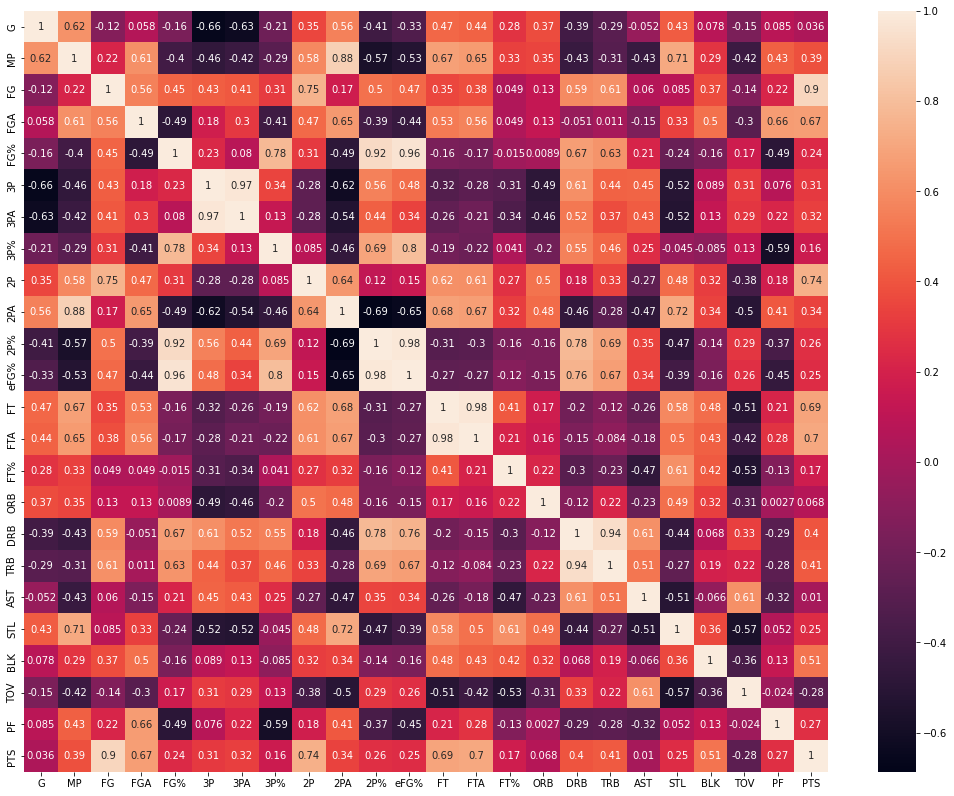

In [79]:
plt.figure(figsize=(18, 14))
sb.heatmap(LeB_C_PG_RS.corr(), annot=True)

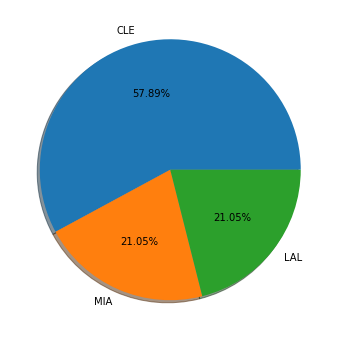

In [80]:
Team = list(LeB_C_PG_RS['Tm'])
CLE = Team.count('CLE')
MIA = Team.count('MIA')
LAL = Team.count('LAL')

Teams = ['CLE', 'MIA', 'LAL']
count = [CLE, MIA, LAL]
plt.figure(figsize=(10,6))
plt.pie(count, labels=Teams, autopct='%.2f%%', shadow=True)
plt.show()

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>],
       [<AxesSubplot:title={'center':'3P'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'2PA'}>],
       [<AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'eFG%'}>,
        <AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'ORB'}>,
        <AxesSubplot:title={'center':'DRB'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center'

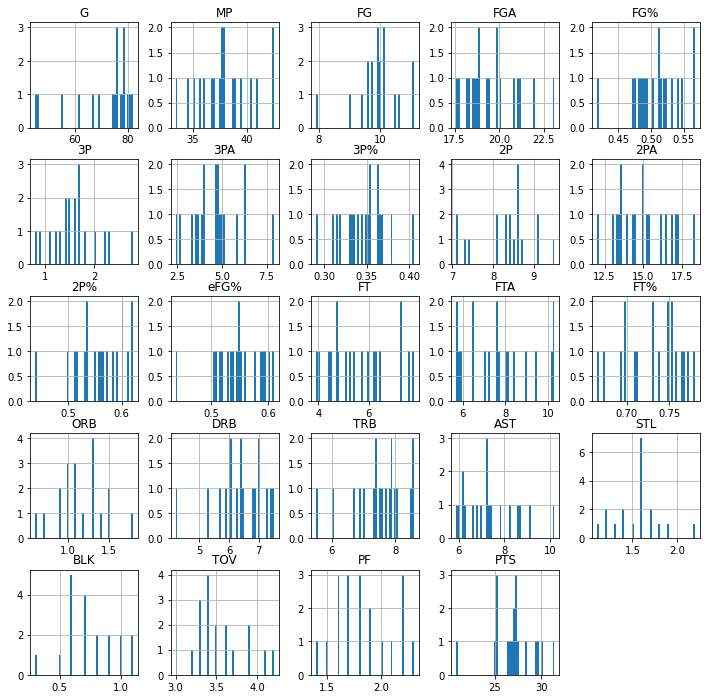

In [81]:
LeB_C_PG_RS.hist(bins=50, figsize=(12,12))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

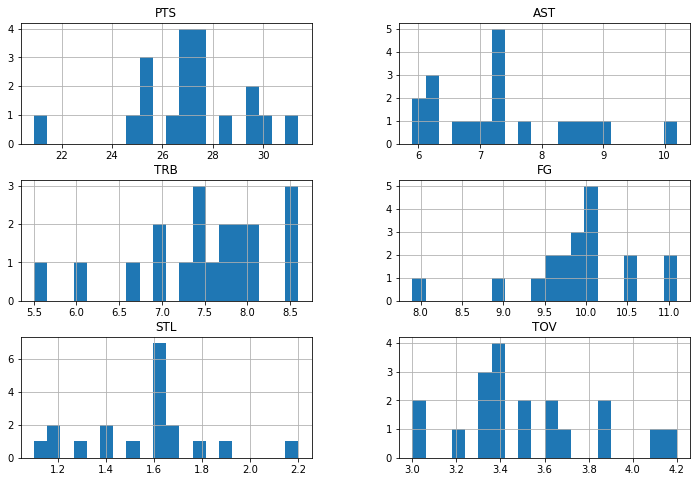

In [82]:
LeB_C_PG_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [83]:
#mean games played, mean minutes played
#potrebbe non significare un cazzo
LeB_C_PG_RS['G'].mean() * LeB_C_PG_RS['MP'].mean() / (36 * 82)
#percentuale di gioco effettiva di LBJ durante la sua carriera

0.9170450194806655

In [84]:
#mean canestri fatti
LeB_C_PG_RS['FG'].mean() / LeB_C_PG_RS['FGA'].mean()

0.5055063121138867

In [85]:
LeB_C_PG_RS['FG%'].mean()

0.506842105263158

In [86]:
#trovo le diverse squadre in cui ha giocato
LeB_C_PG_RS['Tm'].value_counts()

CLE    11
MIA     4
LAL     4
Name: Tm, dtype: int64

In [87]:
a1 = LeB_C_PG_RS['3PA'].mean()
TPA = list(LeB_C_PG_RS['3PA'])

a2 = LeB_C_PG_RS['2PA'].mean()
DPA = list(LeB_C_PG_RS['2PA'])

a = max(TPA)
TPA.index(a)

b = min(TPA)
TPA.index(b)

c = max(DPA)
DPA.index(c)

d = min(DPA)
DPA.index(d)

(a, b, c, d)

(7.9, 2.4, 18.3, 12.0)

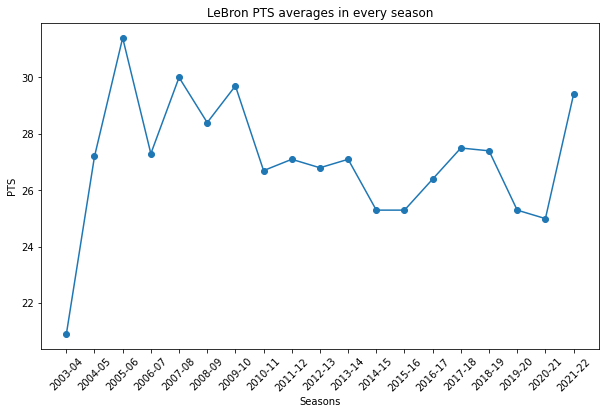

In [88]:
Season = list(LeB_C_PG_RS['Season'])
PTS = list(LeB_C_PG_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o')
plt.title('LeBron PTS averages in every season')
plt.xlabel('Seasons')
plt.ylabel('PTS')
plt.xticks(rotation=45)
plt.show()

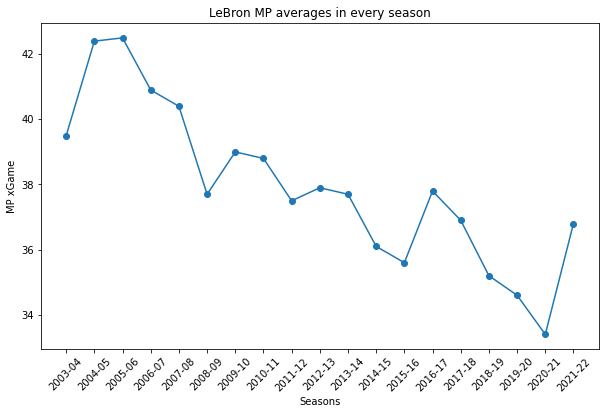

In [89]:
Season = list(LeB_C_PG_RS['Season'])
MP = list(LeB_C_PG_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o')
plt.title('LeBron MP averages in every season')
plt.xlabel('Seasons')
plt.ylabel('MP xGame')
plt.xticks(rotation=45)
plt.show()

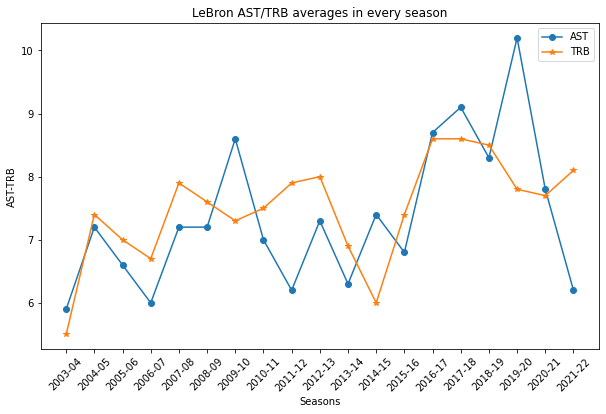

In [90]:
Season = list(LeB_C_PG_RS['Season'])
AST = list(LeB_C_PG_RS['AST'])
TRB = list(LeB_C_PG_RS['TRB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, TRB, '-*', label='TRB')
plt.title('LeBron AST/TRB averages in every season')
plt.xlabel('Seasons')
plt.ylabel('AST-TRB')
plt.xticks(rotation=45)
plt.legend()
plt.show()

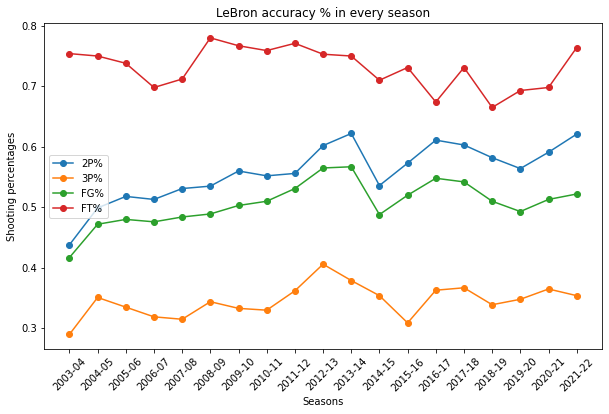

In [91]:
Season = list(LeB_C_PG_RS['Season'])
DPP = list(LeB_C_PG_RS['2P%'])
TPP = list(LeB_C_PG_RS['3P%'])
FGP = list(LeB_C_PG_RS['FG%'])
FTP = list(LeB_C_PG_RS['FT%'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPP, '-o', label='2P%')
plt.plot(Season, TPP, '-o', label='3P%')
plt.plot(Season, FGP, '-o', label='FG%')
plt.plot(Season, FTP, '-o', label='FT%')
plt.title('LeBron accuracy % in every season')
plt.xlabel('Seasons')
plt.ylabel('Shooting percentages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

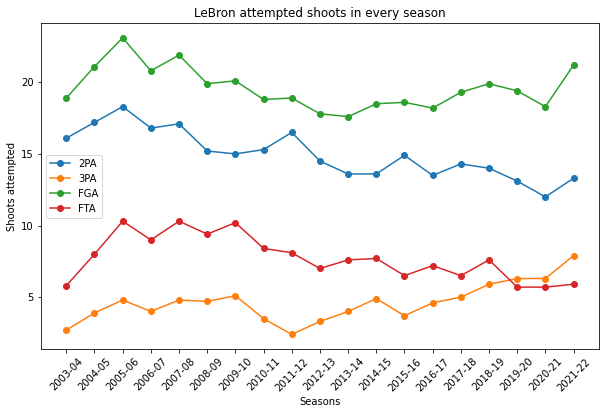

In [92]:
Season = list(LeB_C_PG_RS['Season'])
DPA = list(LeB_C_PG_RS['2PA'])
TPA = list(LeB_C_PG_RS['3PA'])
FGA = list(LeB_C_PG_RS['FGA'])
FTA = list(LeB_C_PG_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

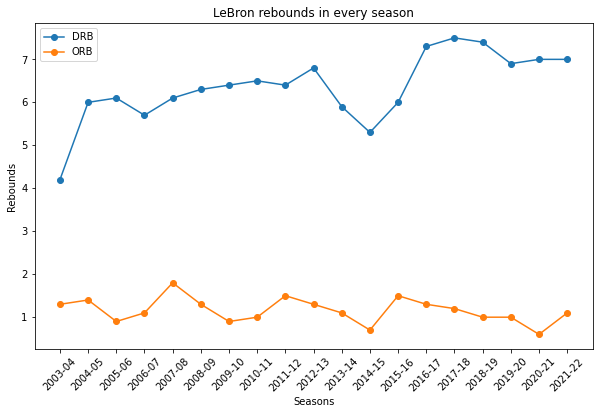

In [93]:
Season = list(LeB_C_PG_RS['Season'])
DRB = list(LeB_C_PG_RS['DRB'])
ORB = list(LeB_C_PG_RS['ORB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DRB, '-o', label='DRB')
plt.plot(Season, ORB, '-o', label='ORB')
plt.title('LeBron rebounds in every season')
plt.xlabel('Seasons')
plt.ylabel('Rebounds')
plt.legend()
plt.xticks(rotation=45)
plt.show()

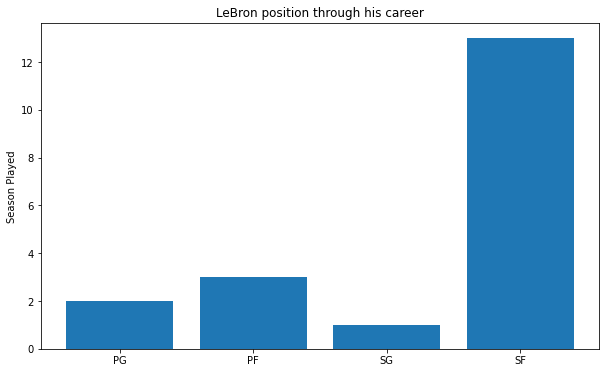

In [94]:
Season = list(LeB_C_PG_RS['Season'])
Position = list(LeB_C_PG_RS['Pos'])
PG = Position.count('PG')
PF = Position.count('PF')
SG = Position.count('SG')
SF = Position.count('SF')

x = ['PG', 'PF', 'SG', 'SF'] 
y = [PG, PF, SG, SF]

plt.figure(figsize=(10, 6))
plt.title('LeBron position through his career')
plt.bar(x, y)  #LeB_C_PG_RS['Pos'].value_counts()
plt.ylabel('Season Played')
plt.show()

Il ruolo di centro non è inserito, in quanto ha cominciato a giocarci da metà stagione quest'anno

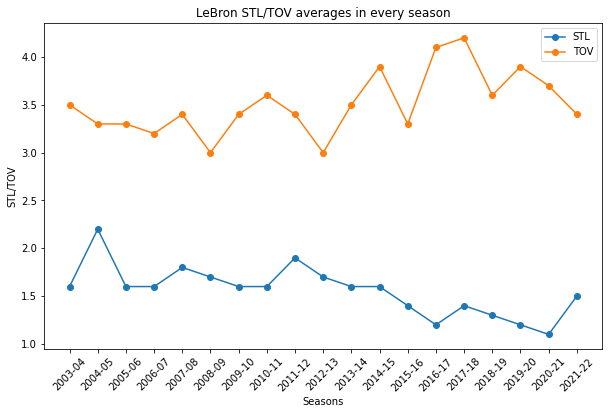

In [95]:
Season = list(LeB_C_PG_RS['Season'])
STL = list(LeB_C_PG_RS['STL'])
TOV = list(LeB_C_PG_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron STL/TOV averages in every season')
plt.xlabel('Seasons')
plt.ylabel('STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

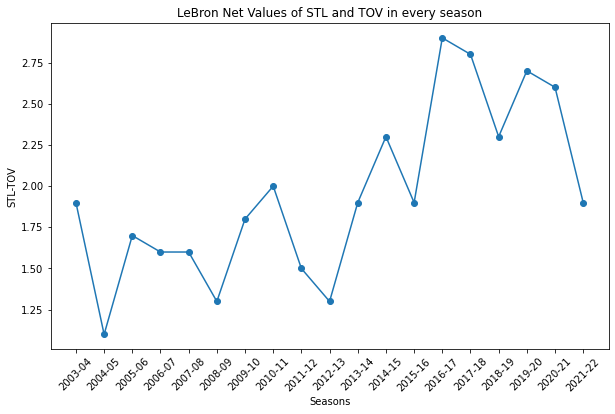

In [96]:
#NET VALUE OF STEELS AND TURNOVERS
#it is obviously negative and means that he gets more turnovers than steels.
#STL - TOV
STL_array = np.array(STL)
TOV_array = np.array(TOV)

plt.figure(figsize=(10, 6))
plt.plot(Season, TOV_array-STL_array, '-o')
plt.title('LeBron Net Values of STL and TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('STL-TOV')
plt.xticks(rotation=45)
plt.show()

In [97]:
a = LeB_C_PG_RS['PTS'].max() 
b = LeB_C_PG_RS['AST'].max()
c = LeB_C_PG_RS['TRB'].max()
d = LeB_C_PG_RS['STL'].max()
e = LeB_C_PG_RS['TOV'].max()
[a, b, c, d, e]

[31.4, 10.2, 8.6, 2.2, 4.2]

In [98]:
a = LeB_C_PG_RS['PTS'].min() 
b = LeB_C_PG_RS['AST'].min()
c = LeB_C_PG_RS['TRB'].min()
d = LeB_C_PG_RS['STL'].min()
e = LeB_C_PG_RS['TOV'].min()
[a, b, c, d, e]

[20.9, 5.9, 5.5, 1.1, 3.0]

In [99]:
a = LeB_C_PG_RS['PTS'].mean() 
b = LeB_C_PG_RS['AST'].mean()
c = LeB_C_PG_RS['TRB'].mean()
d = LeB_C_PG_RS['STL'].mean()
e = LeB_C_PG_RS['TOV'].mean()
[a, b, c, d, e]

[27.063157894736843,
 7.368421052631579,
 7.494736842105263,
 1.5578947368421054,
 3.5105263157894737]

In [100]:
LBJ_Stats = LeB_C_PG_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats.set_index('Season', inplace=True)
LBJ_Stats

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,20.9,5.9,5.5,1.6,3.5,7.9,0.8,7.1,4.4
2004-05,27.2,7.2,7.4,2.2,3.3,9.9,1.4,8.6,6.0
2005-06,31.4,6.6,7.0,1.6,3.3,11.1,1.6,9.5,7.6
2006-07,27.3,6.0,6.7,1.6,3.2,9.9,1.3,8.6,6.3
2007-08,30.0,7.2,7.9,1.8,3.4,10.6,1.5,9.1,7.3
2008-09,28.4,7.2,7.6,1.7,3.0,9.7,1.6,8.1,7.3
2009-10,29.7,8.6,7.3,1.6,3.4,10.1,1.7,8.4,7.8
2010-11,26.7,7.0,7.5,1.6,3.6,9.6,1.2,8.4,6.4
2011-12,27.1,6.2,7.9,1.9,3.4,10.0,0.9,9.1,6.2


In [101]:
x = 'PTS'
ms = LBJ_Stats[x].max()
a = str(LBJ_Stats[LBJ_Stats[x]==ms].index)[8:15]

In [102]:
ms1 = LBJ_Stats['AST'].max()
b = str(LBJ_Stats[LBJ_Stats['AST']==ms1].index)[8:15]

In [103]:
ms2 = LBJ_Stats['TRB'].max()
c = str(LBJ_Stats[LBJ_Stats['TRB']==ms2].index)[8:23]

In [104]:
ms3 = LBJ_Stats['STL'].max()
d = LBJ_Stats[LBJ_Stats['STL']==ms3].index

In [105]:
[ms, ms1, ms2, ms3]
a

'2005-06'

In [106]:
LBJ_Stats['PTS'].max() #index del max da trovare e da fare per altre stats

31.4

## Totals LeBron

In [107]:
LeBron_Career_Totals_RS = pd.DataFrame(data[2])

In [108]:
for el in LeBron_Career_Totals_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_Totals_RS[el] = pd.to_numeric(LeBron_Career_Totals_RS[el])

In [109]:
LeBron_Career_Totals_RS

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,622.0,1492.0,...,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,NaN,0.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,795.0,1684.0,...,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,NaN,4.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,875.0,1823.0,...,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,NaN,5.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,772.0,1621.0,...,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,NaN,1.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,794.0,1642.0,...,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,NaN,7.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,789.0,1613.0,...,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,NaN,7.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,768.0,1528.0,...,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,NaN,4.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,758.0,1485.0,...,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,NaN,4.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,621.0,1169.0,...,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,NaN,0.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,765.0,1354.0,...,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,NaN,4.0


In [110]:
LeB_C_Tot_RS1 = LeBron_Career_Totals_RS.drop(labels=range(19, 24), axis=0)

In [111]:
LeB_C_Tot_RS = LeB_C_Tot_RS1.drop(labels=['Lg', 'Age', 'GS', 'Unnamed: 30', 'Trp Dbl'], axis=1)

In [112]:
LeB_C_Tot_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,3122.0,622.0,1492.0,0.417,63.0,217.0,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
1,2004-05,CLE,SF,80.0,3388.0,795.0,1684.0,0.472,108.0,308.0,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
2,2005-06,CLE,SF,79.0,3361.0,875.0,1823.0,0.480,127.0,379.0,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
3,2006-07,CLE,SF,78.0,3190.0,772.0,1621.0,0.476,99.0,310.0,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
4,2007-08,CLE,SF,75.0,3027.0,794.0,1642.0,0.484,113.0,359.0,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
5,2008-09,CLE,SF,81.0,3054.0,789.0,1613.0,0.489,132.0,384.0,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
6,2009-10,CLE,SF,76.0,2966.0,768.0,1528.0,0.503,129.0,387.0,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
7,2010-11,MIA,SF,79.0,3063.0,758.0,1485.0,0.510,92.0,279.0,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
8,2011-12,MIA,SF,62.0,2326.0,621.0,1169.0,0.531,54.0,149.0,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
9,2012-13,MIA,PF,76.0,2877.0,765.0,1354.0,0.565,103.0,254.0,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [113]:
LeB_C_Tot_RS.to_csv('df_LBJ_Tot_Stats_final.csv', index=False)

In [114]:
LeB_C_Tot_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [115]:
LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.368421,2723.578947,705.894737,1398.947368,0.506842,110.894737,321.052632,0.345421,595.000000,1077.894737,...,0.731474,83.578947,449.157895,532.736842,525.263158,112.210526,54.052632,249.894737,131.263158,1932.631579
std,11.388154,542.463344,120.237217,254.696873,0.036005,24.897333,68.166849,0.026854,116.588545,245.630005,...,0.034139,25.571937,77.543725,93.633352,114.129479,29.833946,18.340828,44.530757,29.062848,358.221255
min,45.000000,1504.000000,422.000000,823.000000,0.417000,54.000000,149.000000,0.290000,318.000000,538.000000,...,0.665000,29.000000,317.000000,346.000000,284.000000,48.000000,25.000000,156.000000,70.000000,1126.000000
25%,68.000000,2409.500000,623.000000,1291.000000,0.486000,101.000000,283.500000,0.331500,531.500000,971.000000,...,0.704000,68.500000,403.000000,478.500000,467.500000,98.000000,44.500000,233.500000,114.000000,1690.500000
50%,76.000000,2902.000000,758.000000,1416.000000,0.510000,113.000000,327.000000,0.348000,650.000000,1134.000000,...,0.738000,83.000000,459.000000,554.000000,521.000000,121.000000,50.000000,260.000000,135.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,0.526500,127.500000,370.500000,0.362500,669.500000,1252.000000,...,0.756500,98.000000,495.000000,591.000000,582.000000,127.000000,66.500000,271.000000,147.500000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,0.567000,149.000000,425.000000,0.406000,748.000000,1444.000000,...,0.780000,133.000000,612.000000,709.000000,747.000000,177.000000,93.000000,347.000000,181.000000,2478.000000


In [116]:
New_LeB_C_Tot_RS = LeB_C_Tot_RS.drop(['ORB', 'DRB', 'PF', 'FG%', '2P%', '3P%', 'FT%', 'Tm', 'Season'], axis=1)
New_LeB_C_Tot_RS

,Pos,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
0,SG,79.0,3122.0,622.0,1492.0,63.0,217.0,559.0,1275.0,0.438,347.0,460.0,432.0,465.0,130.0,58.0,273.0,1654.0
1,SF,80.0,3388.0,795.0,1684.0,108.0,308.0,687.0,1376.0,0.504,477.0,636.0,588.0,577.0,177.0,52.0,262.0,2175.0
2,SF,79.0,3361.0,875.0,1823.0,127.0,379.0,748.0,1444.0,0.515,601.0,814.0,556.0,521.0,123.0,66.0,260.0,2478.0
3,SF,78.0,3190.0,772.0,1621.0,99.0,310.0,673.0,1311.0,0.507,489.0,701.0,526.0,470.0,125.0,55.0,250.0,2132.0
4,SF,75.0,3027.0,794.0,1642.0,113.0,359.0,681.0,1283.0,0.518,549.0,771.0,592.0,539.0,138.0,81.0,255.0,2250.0
5,SF,81.0,3054.0,789.0,1613.0,132.0,384.0,657.0,1229.0,0.530,594.0,762.0,613.0,587.0,137.0,93.0,241.0,2304.0
6,SF,76.0,2966.0,768.0,1528.0,129.0,387.0,639.0,1141.0,0.545,593.0,773.0,554.0,651.0,125.0,77.0,261.0,2258.0
7,SF,79.0,3063.0,758.0,1485.0,92.0,279.0,666.0,1206.0,0.541,503.0,663.0,590.0,554.0,124.0,50.0,284.0,2111.0
8,SF,62.0,2326.0,621.0,1169.0,54.0,149.0,567.0,1020.0,0.554,387.0,502.0,492.0,387.0,115.0,50.0,213.0,1683.0
9,PF,76.0,2877.0,765.0,1354.0,103.0,254.0,662.0,1100.0,0.603,403.0,535.0,610.0,551.0,129.0,67.0,226.0,2036.0


In [117]:
New_LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.368421,2723.578947,705.894737,1398.947368,110.894737,321.052632,595.000000,1077.894737,0.547789,409.947368,558.315789,532.736842,525.263158,112.210526,54.052632,249.894737,1932.631579
std,11.388154,542.463344,120.237217,254.696873,24.897333,68.166849,116.588545,245.630005,0.041835,126.644943,163.682298,93.633352,114.129479,29.833946,18.340828,44.530757,358.221255
min,45.000000,1504.000000,422.000000,823.000000,54.000000,149.000000,318.000000,538.000000,0.438000,178.000000,255.000000,346.000000,284.000000,48.000000,25.000000,156.000000,1126.000000
25%,68.000000,2409.500000,623.000000,1291.000000,101.000000,283.500000,531.500000,971.000000,0.524000,352.500000,475.500000,478.500000,467.500000,98.000000,44.500000,233.500000,1690.500000
50%,76.000000,2902.000000,758.000000,1416.000000,113.000000,327.000000,650.000000,1134.000000,0.550000,388.000000,531.000000,554.000000,521.000000,121.000000,50.000000,260.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,127.500000,370.500000,669.500000,1252.000000,0.581500,496.000000,682.000000,591.000000,582.000000,127.000000,66.500000,271.000000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,149.000000,425.000000,748.000000,1444.000000,0.610000,601.000000,814.000000,709.000000,747.000000,177.000000,93.000000,347.000000,2478.000000


array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

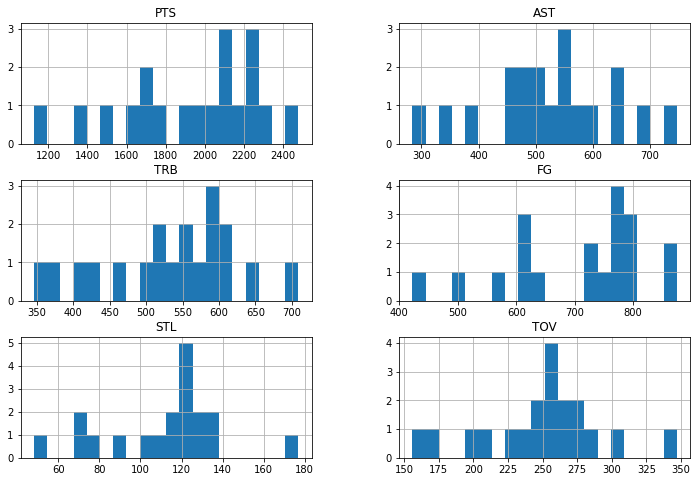

In [118]:
New_LeB_C_Tot_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [119]:
New_LeB_C_Tot_RS.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
G,1.000000,0.962321,0.903830,0.904421,0.043251,0.107536,0.922880,0.907963,-0.334147,0.762749,0.765088,0.773948,0.688614,0.817345,0.574427,0.813493,0.879409
MP,0.962321,1.000000,0.904928,0.955552,-0.008679,0.074265,0.935101,0.970214,-0.440541,0.828188,0.833039,0.703898,0.566854,0.886096,0.594275,0.719739,0.899672
FG,0.903830,0.904928,1.000000,0.913532,0.247859,0.287228,0.978365,0.867542,-0.108042,0.827326,0.839374,0.872753,0.678906,0.755651,0.619308,0.718814,0.981020
FGA,0.904421,0.955552,0.913532,1.000000,0.137309,0.264462,0.912799,0.963520,-0.492632,0.855382,0.869925,0.693744,0.586943,0.824582,0.678248,0.666832,0.925209
3P,0.043251,-0.008679,0.247859,0.137309,1.000000,0.953845,0.042067,-0.122332,0.378195,0.075408,0.103615,0.296756,0.527858,-0.164664,0.160120,0.239209,0.262551
3PA,0.107536,0.074265,0.287228,0.264462,0.953845,1.000000,0.092524,-0.003294,0.151567,0.176172,0.214355,0.278960,0.529422,-0.113429,0.254083,0.262487,0.321395
2P,0.922880,0.935101,0.978365,0.912799,0.042067,0.092524,1.000000,0.920816,-0.192187,0.837114,0.843516,0.836694,0.587429,0.814463,0.604495,0.690226,0.955654
2PA,0.907963,0.970214,0.867542,0.963520,-0.122332,-0.003294,0.920816,1.000000,-0.552879,0.838066,0.842549,0.641935,0.461685,0.886498,0.632772,0.618602,0.870168
eFG%,-0.334147,-0.440541,-0.108042,-0.492632,0.378195,0.151567,-0.192187,-0.552879,1.000000,-0.338377,-0.342605,0.142293,0.036036,-0.459859,-0.328268,-0.128304,-0.165873
FT,0.762749,0.828188,0.827326,0.855382,0.075408,0.176172,0.837114,0.838066,-0.338377,1.000000,0.990059,0.589605,0.417954,0.785435,0.728800,0.442948,0.914164


<AxesSubplot:>

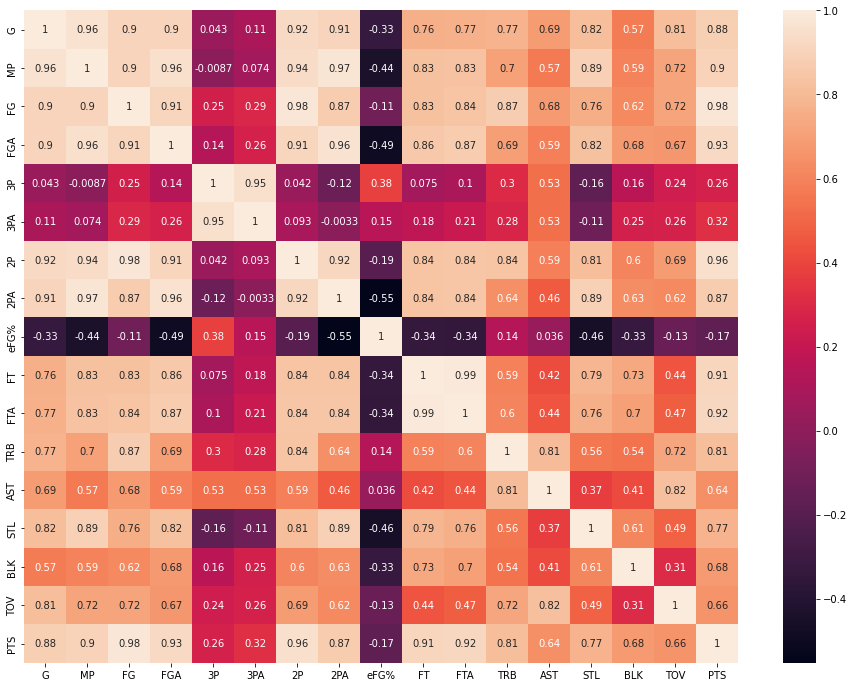

In [120]:
plt.figure(figsize=(16, 12))
sb.heatmap(New_LeB_C_Tot_RS.corr(), annot=True)

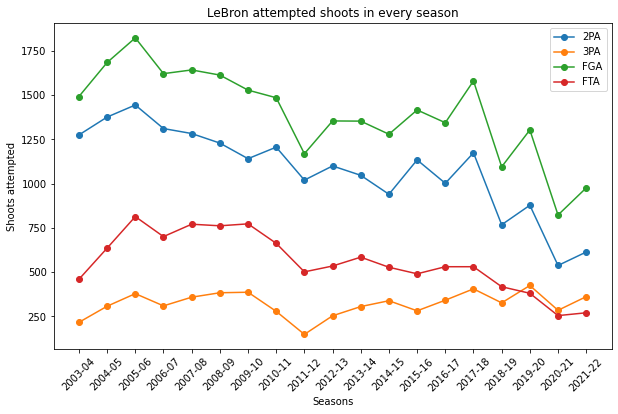

In [121]:
Season = list(LeB_C_Tot_RS['Season'])
DPA = list(LeB_C_Tot_RS['2PA'])
TPA = list(LeB_C_Tot_RS['3PA'])
FGA = list(LeB_C_Tot_RS['FGA'])
FTA = list(LeB_C_Tot_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

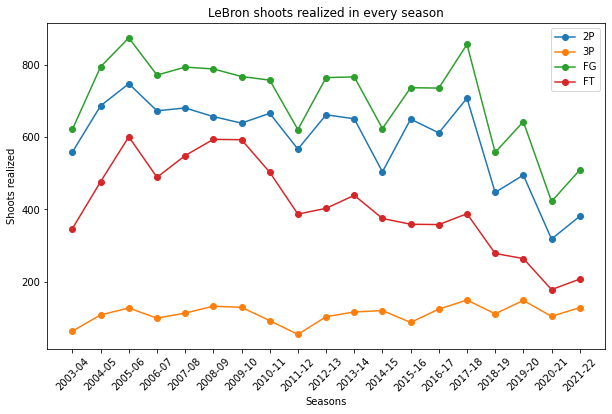

In [122]:
Season = list(LeB_C_Tot_RS['Season'])
DP = list(LeB_C_Tot_RS['2P'])
TP = list(LeB_C_Tot_RS['3P'])
FG = list(LeB_C_Tot_RS['FG'])
FT = list(LeB_C_Tot_RS['FT'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DP, '-o', label='2P')
plt.plot(Season, TP, '-o', label='3P')
plt.plot(Season, FG, '-o', label='FG')
plt.plot(Season, FT, '-o', label='FT')
plt.title('LeBron shoots realized in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots realized')
plt.legend()
plt.xticks(rotation=45)
plt.show()

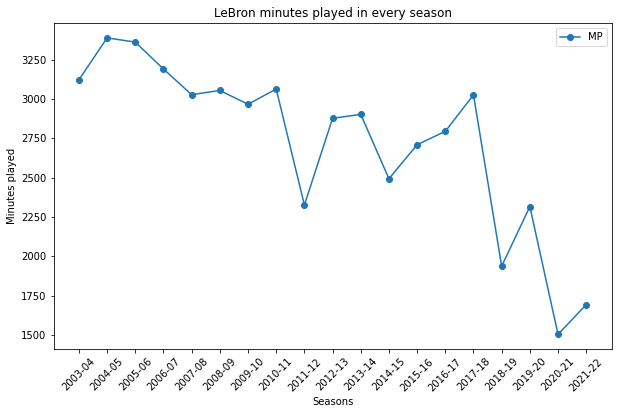

In [123]:
Season = list(LeB_C_Tot_RS['Season'])
MP = list(LeB_C_Tot_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o', label='MP')
plt.title('LeBron minutes played in every season')
plt.xlabel('Seasons')
plt.ylabel('Minutes played')
plt.legend()
plt.xticks(rotation=45)
plt.show()

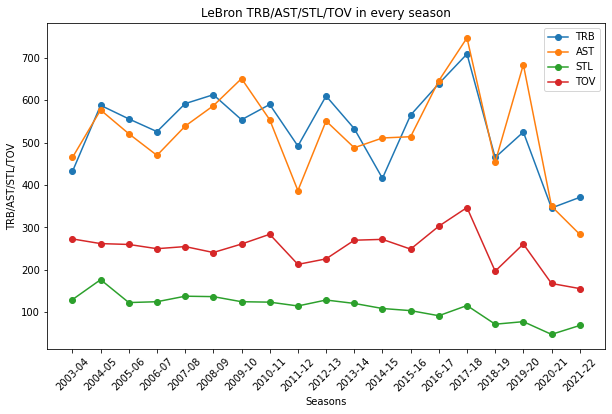

In [124]:
Season = list(LeB_C_Tot_RS['Season'])
TRB = list(LeB_C_Tot_RS['TRB'])
AST = list(LeB_C_Tot_RS['AST'])
STL = list(LeB_C_Tot_RS['STL'])
TOV = list(LeB_C_Tot_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TRB, '-o', label='TRB')
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron TRB/AST/STL/TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('TRB/AST/STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [125]:
#minuti totali per stagione
a = LeB_C_Tot_RS['MP'].max()
b = LeB_C_Tot_RS['MP'].mean()
c = LeB_C_Tot_RS['MP'].min()
[a, b, c]

[3388.0, 2723.5789473684213, 1504.0]

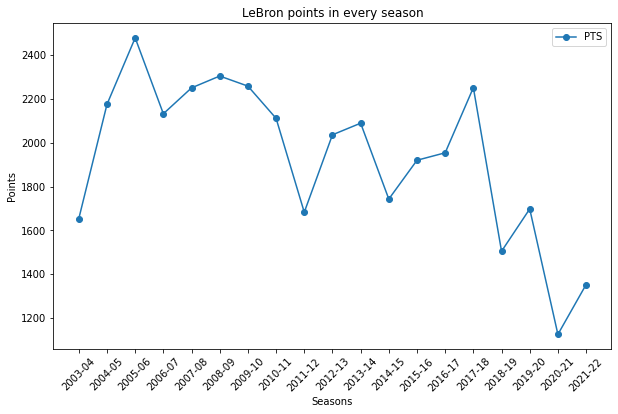

In [126]:
Season = list(LeB_C_Tot_RS['Season'])
PTS = list(LeB_C_Tot_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o', label='PTS')
plt.title('LeBron points in every season')
plt.xlabel('Seasons')
plt.ylabel('Points')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [127]:
#sommare punti a seconda della squadra e vedere con quale squadra ha una media punti più alta

a = LeB_C_Tot_RS['PTS'][0]
b = LeB_C_Tot_RS['PTS'][1]
c = LeB_C_Tot_RS['PTS'][2]
d = LeB_C_Tot_RS['PTS'][3]
e = LeB_C_Tot_RS['PTS'][4]
f = LeB_C_Tot_RS['PTS'][5]
g = LeB_C_Tot_RS['PTS'][6]
h = LeB_C_Tot_RS['PTS'][7]
i = LeB_C_Tot_RS['PTS'][8]
j = LeB_C_Tot_RS['PTS'][9]
k = LeB_C_Tot_RS['PTS'][10]
l = LeB_C_Tot_RS['PTS'][11]
m = LeB_C_Tot_RS['PTS'][12]
n = LeB_C_Tot_RS['PTS'][13]
o = LeB_C_Tot_RS['PTS'][14]
p = LeB_C_Tot_RS['PTS'][15]
q = LeB_C_Tot_RS['PTS'][16]
r = LeB_C_Tot_RS['PTS'][17]
s = LeB_C_Tot_RS['PTS'][18]

PTS_CLE = [a, b, c, d, e, f, g, l, m, n, o]
PTS_MIA = [h, i, j, k]
PTS_LAL = [p, q, r, s]

In [128]:
a = sum(PTS_CLE)/11
b = sum(PTS_MIA)/4
c = sum(PTS_LAL)/4
[a, b, c] #average points per season for every team

[2101.7272727272725, 1979.75, 1420.5]

In [129]:
#punti totali per stagione
a = LeB_C_Tot_RS['PTS'].max()
b = LeB_C_Tot_RS['PTS'].mean()
c = LeB_C_Tot_RS['PTS'].min()
[a, b, c]

[2478.0, 1932.6315789473683, 1126.0]

In [130]:
Season = list(LeB_C_Tot_RS['Season'])
TD = list(LeB_C_Tot_RS['Trp Dbl'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TD, '-o', label='Trp Dbl')
plt.title('LeBron triple double in every season')
plt.xlabel('Seasons')
plt.ylabel('Triple Double')
plt.legend()
plt.xticks(rotation=45)
plt.show()

KeyError: 'Trp Dbl'

In [ ]:
a = LeB_C_Tot_RS['Trp Dbl'].max()
b = LeB_C_Tot_RS['Trp Dbl'].mean()
c = LeB_C_Tot_RS['Trp Dbl'].min()
[a, b, c]

[18.0, 5.421052631578948, 0.0]

In [ ]:
LBJ_Stats_Tot = LeB_C_Tot_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats_Tot.set_index('Season', inplace=True)
LBJ_Stats_Tot

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,1654.0,465.0,432.0,130.0,273.0,622.0,63.0,559.0,347.0
2004-05,2175.0,577.0,588.0,177.0,262.0,795.0,108.0,687.0,477.0
2005-06,2478.0,521.0,556.0,123.0,260.0,875.0,127.0,748.0,601.0
2006-07,2132.0,470.0,526.0,125.0,250.0,772.0,99.0,673.0,489.0
2007-08,2250.0,539.0,592.0,138.0,255.0,794.0,113.0,681.0,549.0
2008-09,2304.0,587.0,613.0,137.0,241.0,789.0,132.0,657.0,594.0
2009-10,2258.0,651.0,554.0,125.0,261.0,768.0,129.0,639.0,593.0
2010-11,2111.0,554.0,590.0,124.0,284.0,758.0,92.0,666.0,503.0
2011-12,1683.0,387.0,492.0,115.0,213.0,621.0,54.0,567.0,387.0


In [ ]:
LBJ_Stats_Tot['PTS'].max() #index del max da trovare e da fare per altre stats

2478.0

In [ ]:
massimo = LBJ_Stats_Tot['PTS'].max()
massimo

2478.0

In [ ]:
LBJ_Stats_Tot[LBJ_Stats_Tot['PTS']==massimo].index

Index(['2005-06'], dtype='object', name='Season')

## Injuries

In [ ]:
#LeBron_Career_Injuries = pd.read_html('https://www.foxsports.com/nba/lebron-james-player-injuries')

In [ ]:
LeBron_Career_Injuries = pd.read_csv('LeBron_Injuries.csv', delimiter=';')

In [ ]:
LeBron_Career_Injuries

,DATE,DESCRIPTION,NR. MATCH MISSED
0,02/12/2022,Knee,0
1,02/07/2022,Knee,0
2,01/27/2022,Knee,5
3,01/22/2022,Abdomen,0
4,01/20/2022,Abdominal,0
...,...,...,...
100,02/11/2019,Undisclosed,0
101,02/09/2019,Load Management,0
102,02/06/2019,Load Management,0
103,02/04/2019,Rest,1


In [ ]:
#mettere colonna tabella con le partite saltate da LeBron per infortunio (excel su pc)

# Season 2020/2021 analysis:
* +/- effort by players assuming their role, Advanced Stats
* Season trends, Per Game Stats

## Advanced Stats

In [132]:
data_adv = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html')
df_adv = pd.DataFrame(data_adv[0])
Adv_Stats = df_adv.where(df_adv["Player"] != "Player").dropna(how='all',axis=0)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,NaN,0.3,1.0,1.3,.085,NaN,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,NaN,-0.1,0.0,-0.1,-0.252,NaN,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,NaN,2.3,1.7,4.0,.119,NaN,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,NaN,5.6,3.2,8.8,.197,NaN,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,NaN,0.5,0.6,1.1,.080,NaN,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,NaN,0.8,0.5,1.3,.092,NaN,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,NaN,2.8,2.2,5.1,.147,NaN,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,NaN,5.9,1.3,7.2,.163,NaN,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,...,NaN,2.1,1.1,3.3,.156,NaN,-0.2,-0.2,-0.5,0.4


In [133]:
df_adv.to_csv('df_AdvStats.csv', index=False)

In [134]:
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           705 non-null    object 
 1   Player       705 non-null    object 
 2   Pos          705 non-null    object 
 3   Age          705 non-null    object 
 4   Tm           705 non-null    object 
 5   G            705 non-null    object 
 6   MP           705 non-null    object 
 7   PER          705 non-null    object 
 8   TS%          703 non-null    object 
 9   3PAr         703 non-null    object 
 10  FTr          703 non-null    object 
 11  ORB%         705 non-null    object 
 12  DRB%         705 non-null    object 
 13  TRB%         705 non-null    object 
 14  AST%         705 non-null    object 
 15  STL%         705 non-null    object 
 16  BLK%         705 non-null    object 
 17  TOV%         704 non-null    object 
 18  USG%         705 non-null    object 
 19  Unnamed:

In [135]:
for el in Adv_Stats:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    Adv_Stats[el] = pd.to_numeric(Adv_Stats[el])

In [136]:
Adv_Stats.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,0.550,0.004,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,0.125,0.250,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,0.596,0.010,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,0.626,0.010,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,0.556,0.270,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,0.563,0.369,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,0.578,0.068,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,0.589,0.357,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,0.599,0.086,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


In [137]:
Adv_Stats['TOV%'].fillna(0, inplace=True)
Adv_Stats['TS%'].fillna(0, inplace=True)
Adv_Stats['3PAr'].fillna(0, inplace=True)
Adv_Stats['FTr'].fillna(0, inplace=True)
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      705 non-null    int64  
 1   Player  705 non-null    object 
 2   Pos     705 non-null    object 
 3   Age     705 non-null    int64  
 4   Tm      705 non-null    object 
 5   G       705 non-null    int64  
 6   MP      705 non-null    int64  
 7   PER     705 non-null    float64
 8   TS%     705 non-null    float64
 9   3PAr    705 non-null    float64
 10  FTr     705 non-null    float64
 11  ORB%    705 non-null    float64
 12  DRB%    705 non-null    float64
 13  TRB%    705 non-null    float64
 14  AST%    705 non-null    float64
 15  STL%    705 non-null    float64
 16  BLK%    705 non-null    float64
 17  TOV%    705 non-null    float64
 18  USG%    705 non-null    float64
 19  OWS     705 non-null    float64
 20  DWS     705 non-null    float64
 21  WS      705 non-null    float64
 22  WS

In [138]:
#Adv_Stats.drop(['Rk', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'FTr'], axis=1, inplace=True)

In [140]:
Adv_Stats_1 = Adv_Stats.where(Adv_Stats["Tm"] != "TOT").dropna(how='all',axis=0) #da mettere per togliere i totali
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      626 non-null    float64
 1   Player  626 non-null    object 
 2   Pos     626 non-null    object 
 3   Age     626 non-null    float64
 4   Tm      626 non-null    object 
 5   G       626 non-null    float64
 6   MP      626 non-null    float64
 7   PER     626 non-null    float64
 8   TS%     626 non-null    float64
 9   3PAr    626 non-null    float64
 10  FTr     626 non-null    float64
 11  ORB%    626 non-null    float64
 12  DRB%    626 non-null    float64
 13  TRB%    626 non-null    float64
 14  AST%    626 non-null    float64
 15  STL%    626 non-null    float64
 16  BLK%    626 non-null    float64
 17  TOV%    626 non-null    float64
 18  USG%    626 non-null    float64
 19  OWS     626 non-null    float64
 20  DWS     626 non-null    float64
 21  WS      626 non-null    float64
 22  WS

In [141]:
Adv_Stats_1.describe()

,Rk,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,270.892971,25.728435,36.827476,833.063898,12.641214,0.539903,0.392224,0.266970,4.792492,15.484505,...,12.754313,18.502556,0.909744,0.845527,1.757188,0.070399,-1.715335,-0.180032,-1.896645,0.420767
std,156.105317,4.096405,21.790911,690.067363,6.957372,0.113518,0.225744,0.281345,4.158976,6.708752,...,7.520225,5.624108,1.562936,0.830453,2.197137,0.108498,4.210557,1.581503,5.072076,1.022648
min,1.000000,19.000000,1.000000,3.000000,-40.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.900000,0.000000,-1.900000,-1.113000,-40.700000,-8.600000,-46.600000,-1.700000
25%,135.250000,23.000000,18.000000,218.000000,9.625000,0.503250,0.239250,0.143000,1.900000,10.800000,...,9.325000,14.625000,0.000000,0.200000,0.200000,0.036000,-3.300000,-1.000000,-3.600000,-0.100000
50%,268.500000,25.000000,36.000000,674.000000,12.500000,0.552000,0.409500,0.227000,3.300000,14.400000,...,11.650000,18.000000,0.300000,0.600000,0.900000,0.080000,-1.400000,-0.200000,-1.400000,0.100000
75%,407.750000,28.000000,57.750000,1347.000000,16.300000,0.598000,0.543750,0.314000,6.475000,18.900000,...,14.800000,21.700000,1.400000,1.300000,2.800000,0.124750,0.400000,0.700000,0.600000,0.600000
max,540.000000,40.000000,72.000000,2667.000000,54.600000,1.078000,1.000000,4.000000,27.400000,41.400000,...,100.000000,41.400000,12.200000,5.200000,15.600000,0.475000,24.100000,8.200000,31.100000,8.800000


In [142]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      626 non-null    float64
 1   Player  626 non-null    object 
 2   Pos     626 non-null    object 
 3   Age     626 non-null    float64
 4   Tm      626 non-null    object 
 5   G       626 non-null    float64
 6   MP      626 non-null    float64
 7   PER     626 non-null    float64
 8   TS%     626 non-null    float64
 9   3PAr    626 non-null    float64
 10  FTr     626 non-null    float64
 11  ORB%    626 non-null    float64
 12  DRB%    626 non-null    float64
 13  TRB%    626 non-null    float64
 14  AST%    626 non-null    float64
 15  STL%    626 non-null    float64
 16  BLK%    626 non-null    float64
 17  TOV%    626 non-null    float64
 18  USG%    626 non-null    float64
 19  OWS     626 non-null    float64
 20  DWS     626 non-null    float64
 21  WS      626 non-null    float64
 22  WS

In [143]:
Adv_Stats_1.to_csv('Adv_Stats_1.csv', index=False)

In [144]:
Adv_Stats_1[['Pos', 'Tm']].describe()

,Pos,Tm
count,626,626
unique,5,30
top,SG,HOU
freq,147,30


<AxesSubplot:>

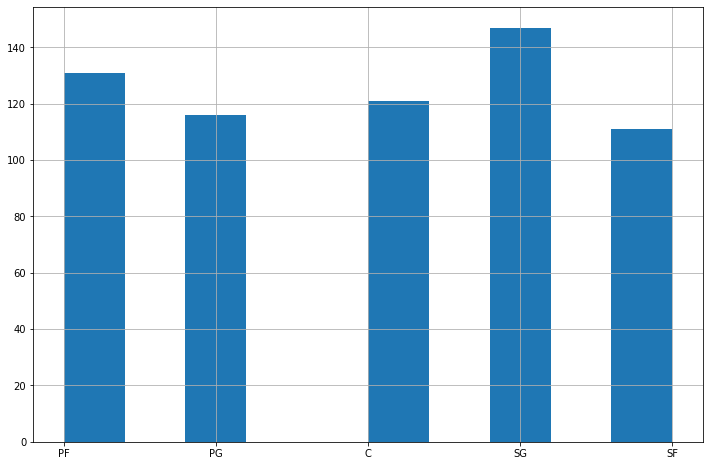

In [145]:
Adv_Stats_1['Pos'].hist(bins=10, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'Rk'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'PER'}>],
       [<AxesSubplot:title={'center':'TS%'}>,
        <AxesSubplot:title={'center':'3PAr'}>,
        <AxesSubplot:title={'center':'FTr'}>,
        <AxesSubplot:title={'center':'ORB%'}>,
        <AxesSubplot:title={'center':'DRB%'}>],
       [<AxesSubplot:title={'center':'TRB%'}>,
        <AxesSubplot:title={'center':'AST%'}>,
        <AxesSubplot:title={'center':'STL%'}>,
        <AxesSubplot:title={'center':'BLK%'}>,
        <AxesSubplot:title={'center':'TOV%'}>],
       [<AxesSubplot:title={'center':'USG%'}>,
        <AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>,
        <AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>],
       [<AxesSubplot:title={'center':'OBPM'}>,
        <AxesSubplot:ti

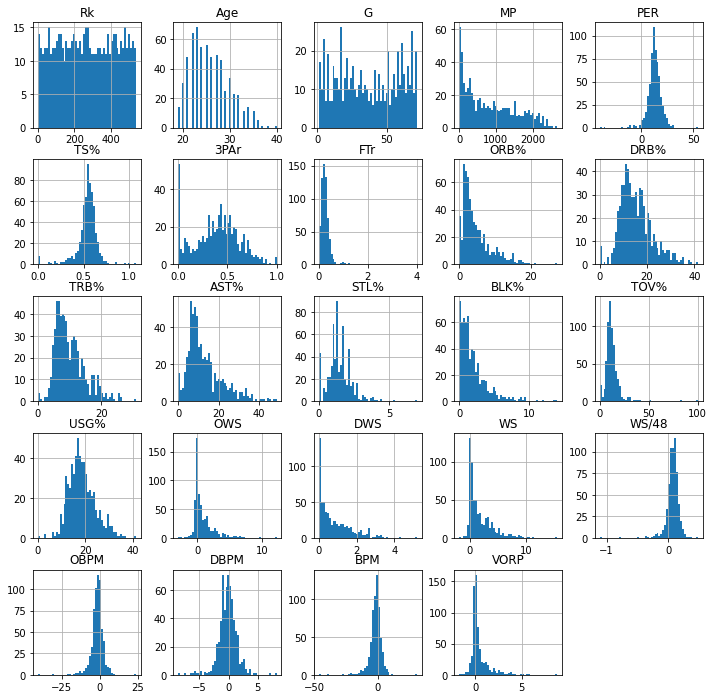

In [146]:
Adv_Stats_1.hist(bins=50, figsize=(12,12))

<AxesSubplot:>

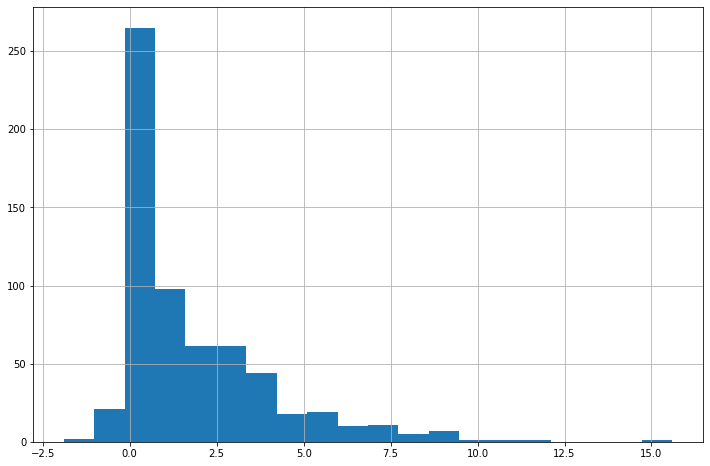

In [147]:
Adv_Stats_1['WS'].hist(bins=20, figsize=(12,8))

In [ ]:
#interesting stats, max/mean/min of WS/OWS/DWS/OBPM/DBPM/BPM/VORP

array([[<AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>],
       [<AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>]], dtype=object)

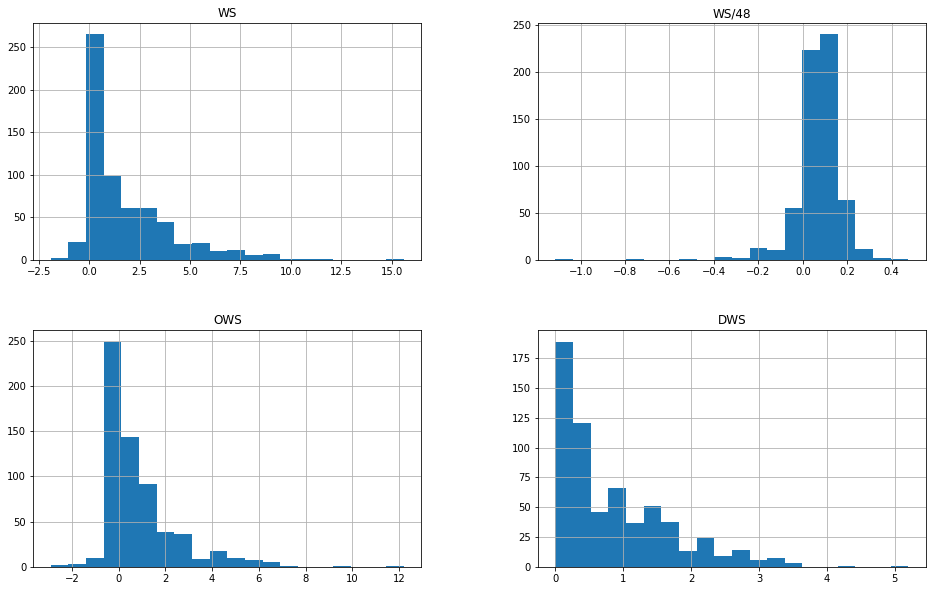

In [ ]:
Adv_Stats_1[['WS', 'WS/48', 'OWS', 'DWS']].hist(bins=20, figsize=(16,10))

In [ ]:
a = Adv_Stats_1['WS'].mean()
b = Adv_Stats_1['WS/48'].mean()
c = Adv_Stats_1['OWS'].mean()
d = Adv_Stats_1['DWS'].mean()
[a, b, c, d]

[1.7571884984025559,
 0.07039936102236422,
 0.9097444089456869,
 0.8455271565495207]

In [ ]:
a = Adv_Stats_1['WS'].min()
b = Adv_Stats_1['WS/48'].min()
c = Adv_Stats_1['OWS'].min()
d = Adv_Stats_1['DWS'].min()
[a, b, c, d]

[-1.9, -1.113, -2.9, 0.0]

In [ ]:
a = Adv_Stats_1['WS'].max()
b = Adv_Stats_1['WS/48'].max()
c = Adv_Stats_1['OWS'].max()
d = Adv_Stats_1['DWS'].max()
[a, b, c, d]

[15.6, 0.475, 12.2, 5.2]

In [ ]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS', ascending=False)[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Nikola Jokić,15.6,0.301,12.2,3.4
Rudy Gobert,11.3,0.248,6.1,5.2
Damian Lillard,10.4,0.209,9.6,0.8
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Jimmy Butler,9.3,0.255,6.6,2.7
...,...,...,...,...
Théo Maledon,-0.8,-0.021,-1.9,1.1
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4


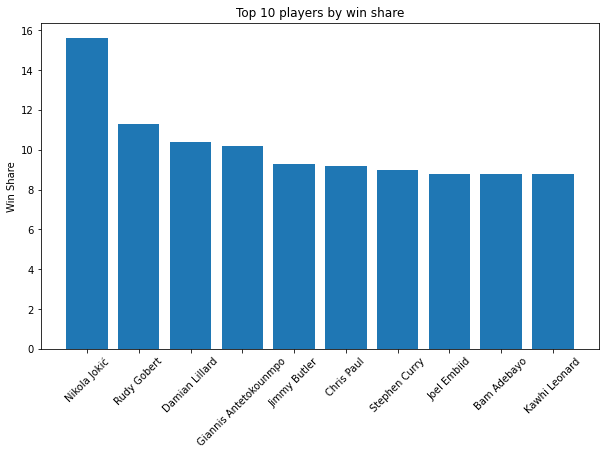

In [ ]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [ ]:
a = players_by_most_win_share['WS']['Stephen Curry']
b = players_by_most_win_share['WS']['LeBron James']
c = players_by_most_win_share['WS']['Giannis Antetokounmpo']
d = players_by_most_win_share['WS']['John Wall']
[a, b, c, d]

[9.0, 5.6, 10.2, -0.2]

In [ ]:
players_by_most_win_share['WS'].mean()

1.7571884984025559

In [ ]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS')[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Aleksej Pokusevski,-1.9,-0.084,-2.9,1.0
Killian Hayes,-1.1,-0.081,-1.8,0.6
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4
Théo Maledon,-0.8,-0.021,-1.9,1.1
...,...,...,...,...
Jimmy Butler,9.3,0.255,6.6,2.7
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Damian Lillard,10.4,0.209,9.6,0.8


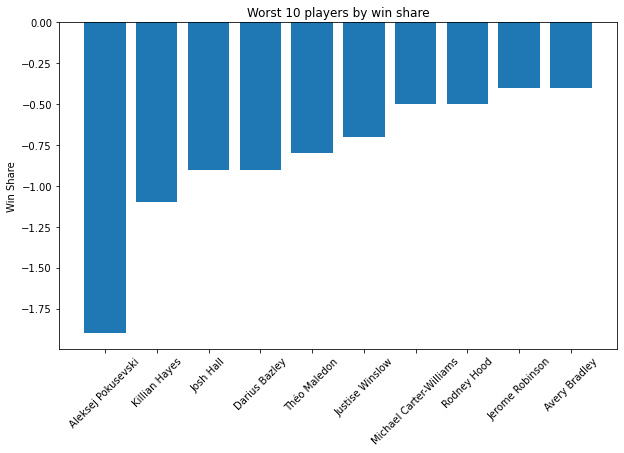

In [ ]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Worst 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Adv_players_groupby = Adv_Stats_1.groupby('Player')

In [ ]:
Adv_players_groupby_sum = Adv_players_groupby.sum()

In [ ]:
a = Adv_players_groupby_sum['WS'].loc['LeBron James']
b = Adv_players_groupby_sum['WS'].loc['Stephen Curry']
c = Adv_players_groupby_sum['WS'].loc['Nikola Jokić']
[a, b, c]

[5.6, 9.0, 15.6]

<AxesSubplot:>

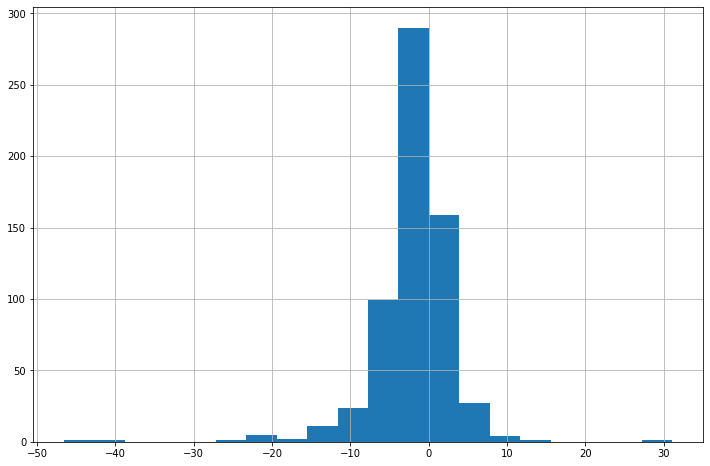

In [ ]:
Adv_Stats_1['BPM'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'VORP'}>]], dtype=object)

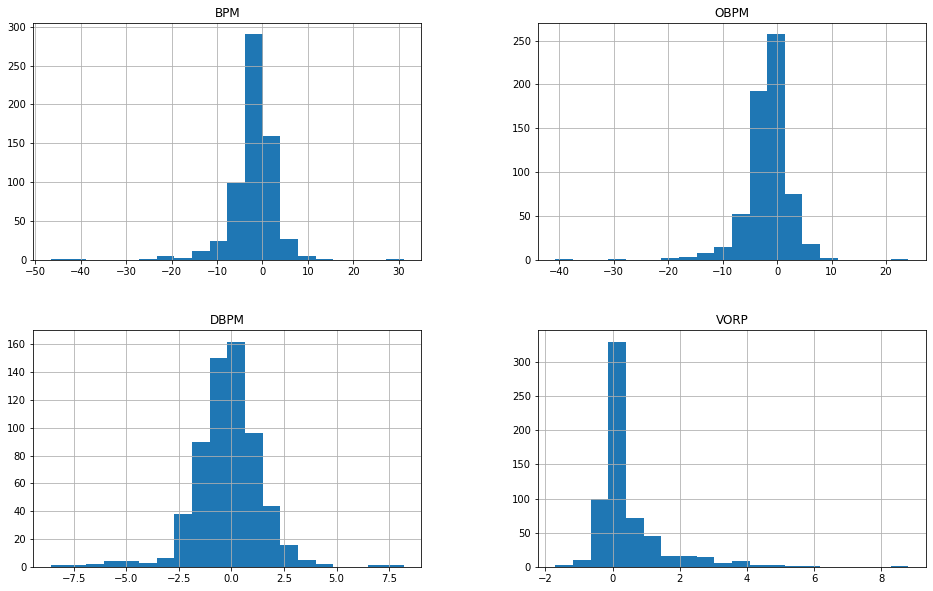

In [ ]:
Adv_Stats_1[['BPM', 'OBPM', 'DBPM', 'VORP']].hist(bins=20, figsize=(16,10))

In [ ]:
a = Adv_Stats_1['BPM'].mean()
b = Adv_Stats_1['VORP'].mean()
c = Adv_Stats_1['OBPM'].mean()
d = Adv_Stats_1['DBPM'].mean()
[a, b, c, d]

[-1.8966453674121404,
 0.42076677316293926,
 -1.7153354632587858,
 -0.1800319488817891]

In [ ]:
a = Adv_Stats_1['BPM'].min()
b = Adv_Stats_1['VORP'].min()
c = Adv_Stats_1['OBPM'].min()
d = Adv_Stats_1['DBPM'].min()
[a, b, c, d]

[-46.6, -1.7, -40.7, -8.6]

In [ ]:
a = Adv_Stats_1['BPM'].max()
b = Adv_Stats_1['VORP'].max()
c = Adv_Stats_1['OBPM'].max()
d = Adv_Stats_1['DBPM'].max()
[a, b, c, d]

[31.1, 8.8, 24.1, 8.2]

In [ ]:
players_by_most_BPM = Adv_Stats_1.sort_values(by='BPM', ascending=False)[['Player', 'BPM', 'OBPM', 'DBPM', 'VORP']]
players_by_most_BPM.set_index('Player', inplace=True)
players_by_most_BPM

,BPM,OBPM,DBPM,VORP
Player,,,,
Udonis Haslem,31.1,24.1,7.0,0.0
Nikola Jokić,12.1,9.1,3.0,8.8
Gary Payton II,9.2,1.0,8.2,0.1
Giannis Antetokounmpo,9.0,6.2,2.8,5.6
Stephen Curry,8.7,8.3,0.4,5.8
...,...,...,...,...
Ignas Brazdeikis,-21.4,-15.2,-6.2,0.0
Jared Harper,-22.1,-16.6,-5.5,-0.1
Noah Vonleh,-26.7,-20.9,-5.8,-0.1


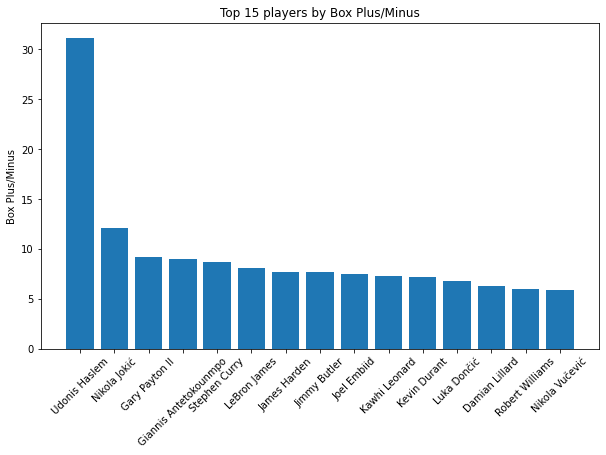

In [ ]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['BPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus')
plt.bar(x, y)
plt.ylabel('Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

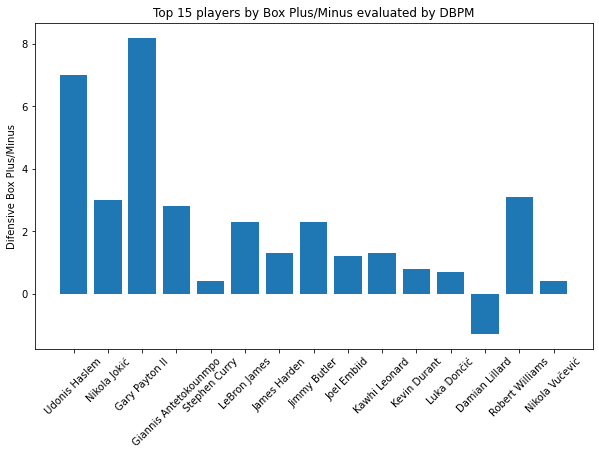

In [ ]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['DBPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus evaluated by DBPM')
plt.bar(x, y)
plt.ylabel('Difensive Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

In [ ]:
a = players_by_most_BPM['BPM']['Stephen Curry']
b = players_by_most_BPM['BPM']['LeBron James']
c = players_by_most_BPM['BPM']['Lonzo Ball']
d = players_by_most_BPM['BPM']['Seth Curry']
e = players_by_most_BPM['BPM']['DeMar DeRozan']
[a, b, c, d, e]

[8.7, 8.1, 1.7, -0.3, 3.1]

In [ ]:
players_by_most_BPM['BPM']['James Harden']

Player
James Harden    7.7
James Harden    5.0
Name: BPM, dtype: float64

In [ ]:
players_by_most_VORP = Adv_Stats_1.sort_values(by='VORP', ascending=False)[['Player', 'VORP', 'BPM', 'OBPM', 'DBPM']]
players_by_most_VORP.set_index('Player', inplace=True)
players_by_most_VORP

,VORP,BPM,OBPM,DBPM
Player,,,,
Nikola Jokić,8.8,12.1,9.1,3.0
Stephen Curry,5.8,8.7,8.3,0.4
Giannis Antetokounmpo,5.6,9.0,6.2,2.8
Luka Dončić,5.1,6.8,6.1,0.7
Damian Lillard,5.0,6.3,7.5,-1.3
...,...,...,...,...
Darius Bazley,-1.0,-4.4,-3.1,-1.3
Aleksej Pokusevski,-1.1,-6.1,-5.1,-1.0
Théo Maledon,-1.3,-5.0,-4.0,-1.0


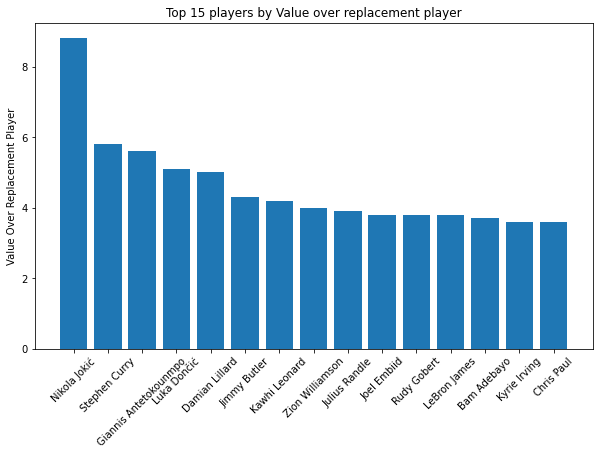

In [ ]:
x = players_by_most_VORP[:15].index
y = players_by_most_VORP[:15]['VORP']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Value over replacement player')
plt.bar(x, y)
plt.ylabel('Value Over Replacement Player')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#fare medie divise per ruolo per WS e BPM 
# Adv_Stats_1['BPM'] oppure Adv_Stats_1['WS'] poi fare distribuzione tenendo conto dei ruoli
#da fare anche per stats per game

## Per Game Stats

In [ ]:
data = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_per_game.html")
df_xGStats = pd.DataFrame(data[0])
xG_Stats = df_xGStats.where(df_xGStats["Player"] != "Player").dropna(how='all', axis=0)

In [ ]:
df_xGStats.to_csv('df_xGStats.csv', index=False)

In [ ]:
xG_Stats_1 = xG_Stats.where(xG_Stats["Tm"] != "TOT").dropna(how='all', axis=0)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      626 non-null    object
 1   Player  626 non-null    object
 2   Pos     626 non-null    object
 3   Age     626 non-null    object
 4   Tm      626 non-null    object
 5   G       626 non-null    object
 6   GS      626 non-null    object
 7   MP      626 non-null    object
 8   FG      626 non-null    object
 9   FGA     626 non-null    object
 10  FG%     624 non-null    object
 11  3P      626 non-null    object
 12  3PA     626 non-null    object
 13  3P%     593 non-null    object
 14  2P      626 non-null    object
 15  2PA     626 non-null    object
 16  2P%     620 non-null    object
 17  eFG%    624 non-null    object
 18  FT      626 non-null    object
 19  FTA     626 non-null    object
 20  FT%     598 non-null    object
 21  ORB     626 non-null    object
 22  DRB     626 non-null    ob

In [ ]:
xG_Stats_1.drop('Rk', axis=1, inplace=True)

In [ ]:
for el in xG_Stats_1:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    xG_Stats_1[el] = pd.to_numeric(xG_Stats_1[el])

In [ ]:
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     624 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     593 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     620 non-null    float64
 16  eFG%    624 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     598 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [ ]:
xG_Stats_1.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,624.000000,626.000000,626.000000,593.000000,...,598.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,17.252396,19.526837,3.201118,7.007668,0.443099,0.974601,2.746006,0.313315,...,0.751062,0.807827,2.783387,3.590256,1.949361,0.612460,0.415974,1.080511,1.627157,8.715974
std,4.096405,21.790911,22.015199,9.367063,2.327811,4.809408,0.115565,0.895416,2.268940,0.129626,...,0.151528,0.737207,1.835580,2.404792,1.846313,0.400286,0.417268,0.833482,0.776349,6.411899
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,18.000000,0.000000,12.100000,1.400000,3.400000,0.397750,0.200000,0.900000,0.269000,...,0.682000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,25.000000,36.000000,5.000000,19.500000,2.700000,5.900000,0.440500,0.750000,2.300000,0.340000,...,0.776000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,28.000000,57.750000,30.000000,27.300000,4.400000,9.400000,0.497250,1.500000,4.275000,0.389000,...,0.845750,1.000000,3.775000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.975000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [ ]:
#fillna con le percentuali = 0 quindi aggiungere 0 dove manca
xG_Stats_1['FG%'].fillna(0, inplace=True)
xG_Stats_1['3P%'].fillna(0, inplace=True)
xG_Stats_1['2P%'].fillna(0, inplace=True)
xG_Stats_1['eFG%'].fillna(0, inplace=True)
xG_Stats_1['FT%'].fillna(0, inplace=True)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     626 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     626 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     626 non-null    float64
 16  eFG%    626 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     626 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [ ]:
#rimuovere qualche variabile sulla quale non fare nessuna task, ad esempio PF, eFG% ecc.

In [ ]:
#replace some special letters with letters in the keyboard

In [ ]:
xG_Stats_1.to_csv('xG_Stats_1.csv', index=False)

In [ ]:
#fare plot con una variabile e tutti i giocatori per vedere le varie similutidini ecc

<AxesSubplot:>

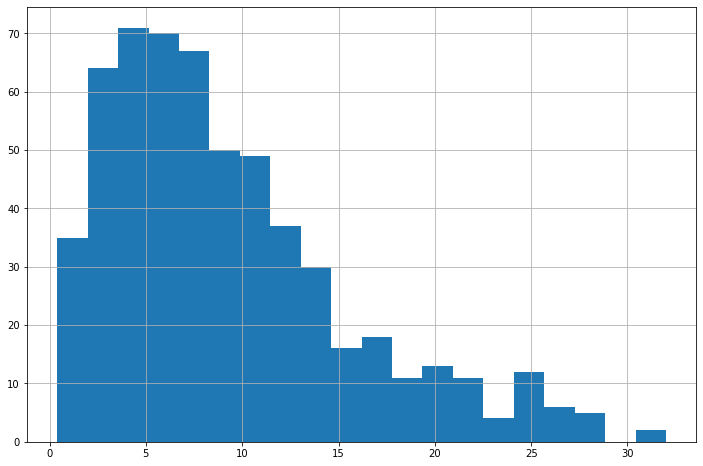

In [ ]:
xG_Stats_1['PTS'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'MP'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'STL'}>]], dtype=object)

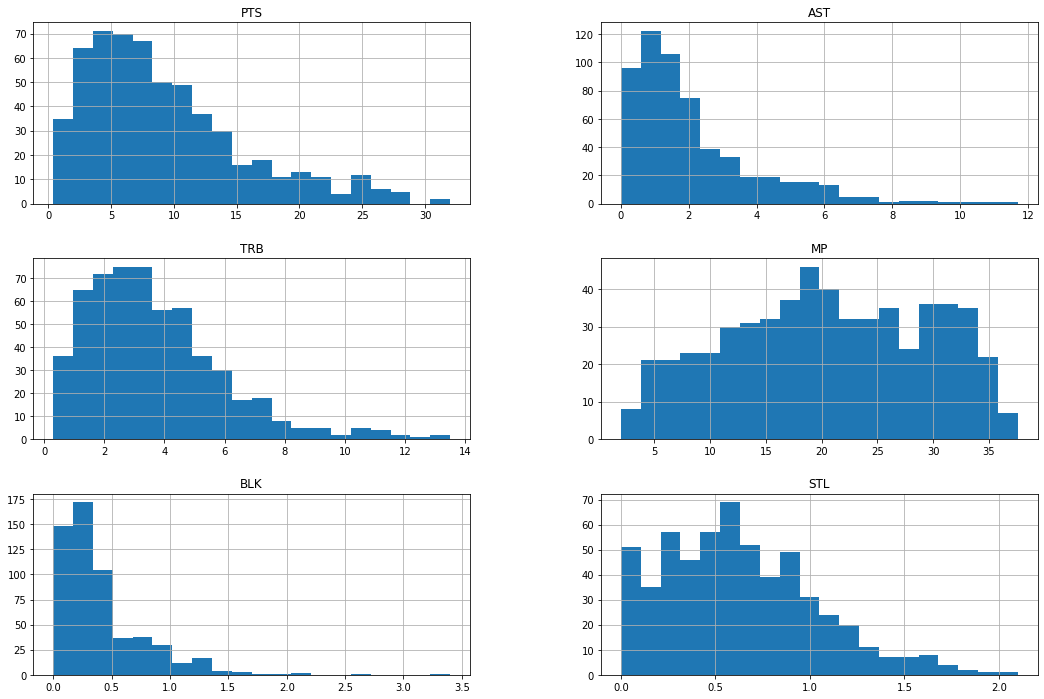

In [ ]:
xG_Stats_1[['PTS', 'AST', 'TRB', 'MP', 'BLK', 'STL']].hist(bins=20, figsize=(18,12))

In [ ]:
#giocatore con media punti/assist/rimbalzi/stoppate ecc più alta
a = xG_Stats_1['PTS'].max()
b = xG_Stats_1['AST'].max()
c = xG_Stats_1['TRB'].max()
d = xG_Stats_1['STL'].max()
e = xG_Stats_1['TOV'].max()
f = xG_Stats_1['BLK'].max()
[a,b,c,d,e,f]

[32.0, 11.7, 13.5, 2.1, 4.8, 3.4]

In [ ]:
a = xG_Stats_1['PTS'].mean()
b = xG_Stats_1['AST'].mean()
c = xG_Stats_1['TRB'].mean()
d = xG_Stats_1['STL'].mean()
e = xG_Stats_1['TOV'].mean()
f = xG_Stats_1['BLK'].mean()
[a,b,c,d,e,f]

[9.276182136602452,
 2.0924693520140107,
 3.6978984238178634,
 0.6485113835376533,
 1.1316987740805604,
 0.41348511383537656]

In [ ]:
a = xG_Stats_1['PTS'].min()
b = xG_Stats_1['AST'].min()
c = xG_Stats_1['TRB'].min()
d = xG_Stats_1['STL'].min()
e = xG_Stats_1['TOV'].min()
f = xG_Stats_1['BLK'].min()
[a,b,c,d,e,f]

[0.4, 0.0, 0.3, 0.0, 0.0, 0.0]

In [ ]:
#liste per variabili varie
PTS = list(xG_Stats_1['PTS'])

In [ ]:
#xG_Stats_1[xG_Stats_1['PTS'].max()]

In [ ]:
players_by_most_games = xG_Stats_1.sort_values(by='GS', ascending=False)[['Player', 'G', 'GS', 'PTS']]
players_by_most_games.set_index('Player', inplace=True)
players_by_most_games

,G,GS,PTS
Player,,,
Bojan Bogdanović,72,72,17.0
Nikola Jokić,72,72,26.4
Mikal Bridges,72,72,13.5
Duncan Robinson,72,72,13.1
RJ Barrett,72,72,17.6
...,...,...,...
Alfonzo McKinnie,39,0,3.1
Anfernee Simons,64,0,7.8
Tim Frazier,5,0,1.6


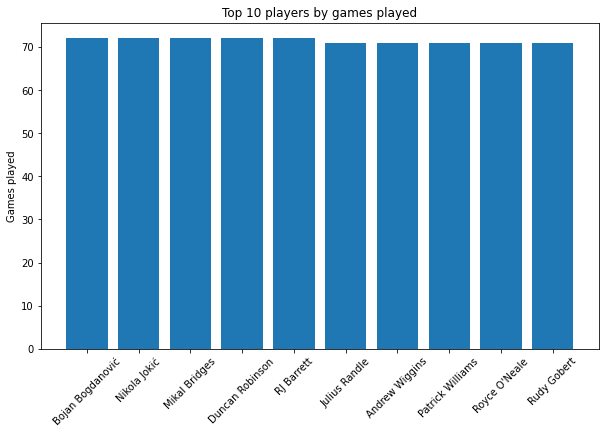

In [ ]:
x = players_by_most_games[:10].index
y = players_by_most_games[:10]['GS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by games played')
plt.bar(x, y)
plt.ylabel('Games played')
plt.xticks(rotation=45)
plt.show()

In [ ]:
players_by_most_games['GS']['Mikal Bridges']

72

In [ ]:
players_by_most_points = xG_Stats_1.sort_values(by='PTS', ascending=False)[['Player', 'PTS', 'AST', 'TRB']]
players_by_most_points.set_index('Player', inplace=True)
players_by_most_points

,PTS,AST,TRB
Player,,,
Stephen Curry,32.0,5.8,5.5
Bradley Beal,31.3,4.4,4.7
Damian Lillard,28.8,7.5,4.2
Joel Embiid,28.5,2.8,10.6
Giannis Antetokounmpo,28.1,5.9,11.0
...,...,...,...
Nick Richards,0.8,0.1,0.6
Vincent Poirier,0.8,0.2,1.4
Ty-Shon Alexander,0.6,0.4,0.7


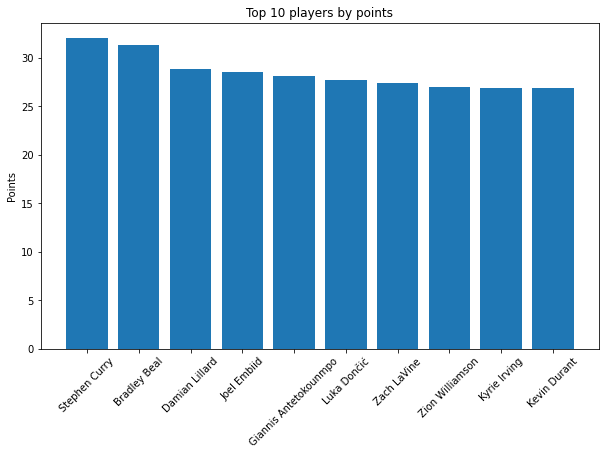

In [ ]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['PTS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points')
plt.bar(x, y)
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

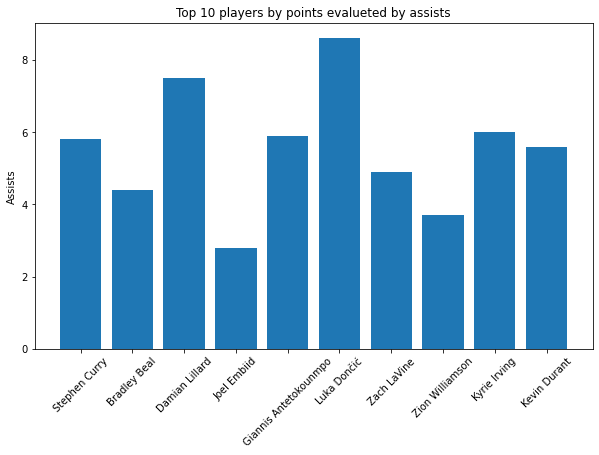

In [ ]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['AST']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points evalueted by assists')
plt.bar(x, y)
plt.ylabel('Assists')
plt.xticks(rotation=45)
plt.show()

In [ ]:
a = players_by_most_points['PTS']['Stephen Curry']
b = players_by_most_points['PTS']['LeBron James']
c = players_by_most_points['PTS']['Nikola Jokić']
d = players_by_most_points['PTS']['Giannis Antetokounmpo']
e = players_by_most_points['PTS']['John Wall']
[a, b, c, d, e]

[32.0, 25.0, 26.4, 28.1, 20.6]

In [ ]:
xG_players_groupby = xG_Stats_1.groupby('Player')

In [ ]:
xG_players_groupby_sum = xG_players_groupby.sum()

In [ ]:
a = xG_players_groupby_sum['PTS'].loc['LeBron James']
b = xG_players_groupby_sum['PTS'].loc['Stephen Curry']
[a, b]

[25.0, 32.0]

In [ ]:
a = xG_players_groupby_sum['AST'].loc['LeBron James']
b = xG_players_groupby_sum['AST'].loc['Stephen Curry']
[a, b]

[7.8, 5.8]